# Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import BaggingClassifier

In [2]:
#Import models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
df = pd.read_csv("titanic.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Visualization

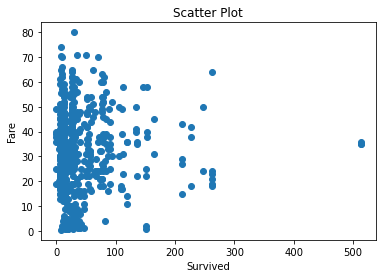

In [5]:
# Scatter plot with day against tip
plt.scatter(df['Fare'], df['Age'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('Survived')
plt.ylabel('Fare')
 
plt.show()

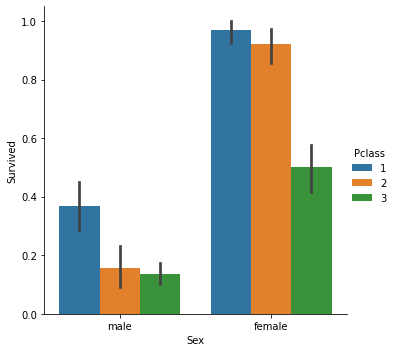

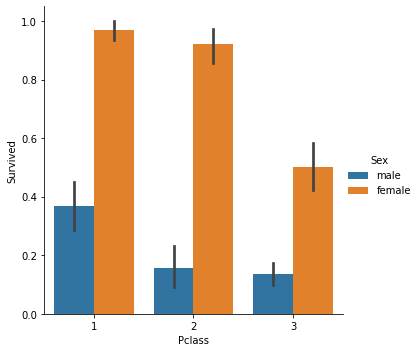

In [6]:
import seaborn as sns

sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df)

sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=df)

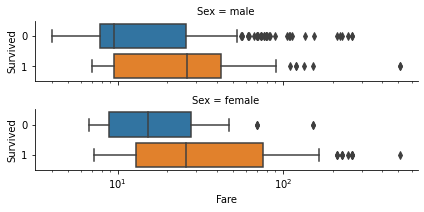

In [7]:
g = sns.catplot(x="Fare", y="Survived", row="Sex",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df.query("Fare > 0"))
g.set(xscale="log")

# Preprocess data

In [8]:
counter1 = 0
counter2 = 0
counter3 = 0
counter4 = 0
counter5 = 0

val1=0
val2=0
val3=0
val4=0
val5=0

counter=0


for i in df['Name']:
    if pd.isna(df['Age'][counter]) == False:
        if (i.find('Mrs') != -1):
            counter1 += df.iloc[counter]['Age']
            val1 += 1
        elif (i.find('Mr') != -1):
            counter2 += df.iloc[counter]['Age']
            val2 += 1
        elif (i.find('Miss') != -1):
            counter3 += df.iloc[counter]['Age']
            val3 += 1
        elif (i.find('Master') != -1):
            counter4 += df.iloc[counter]['Age']
            val4 += 1
        else:
            counter5 += df.iloc[counter]['Age']
            val5 += 1
    counter +=1
        
av1 = counter1/val1
av2 = counter2/val2
av3 = counter3/val3
av4 = counter4/val4
av5 = counter5/val5

print(f'{av1},{av2},{av3},{av4},{av5}')

35.642857142857146,32.409774436090224,21.77777777777778,4.574166666666667,42.65217391304348


In [9]:
counter = 0
for i in df['Age']:
    if pd.isna(i) == True:
        i = df.iloc[counter]['Name']
        if (i.find('Mrs') != -1):
            df.loc[counter,'Age'] = av1
        elif (i.find('Mr') != -1):
            df.loc[counter,'Age'] = av2
        elif (i.find('Miss') != -1):
            df.loc[counter,'Age'] = av3
        elif (i.find('Master') != -1):
            df.loc[counter,'Age'] = av4
        else:
            df.loc[counter,'Age'] = av5
    counter +=1
    
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Preprocess database 

#Eliminate columns that won't be used and are metadata
df = df.drop(columns=[
    'PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'])

In [11]:
#Encoding to change categorical values.
s = (df.dtypes == 'object')
cols = list(s[s].index)

OHE = OneHotEncoder(handle_unknown='ignore',sparse=False)

data_cols = pd.DataFrame(OHE.fit_transform(df[cols]))

df= pd.concat([df.reset_index(drop=True),data_cols.reset_index(drop=True)], axis=1)
df.rename(columns = {0:'female',1:'male'}, inplace = True)
df = df.drop(columns=['Sex'])

df

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,22.000000,1,0,7.2500,0.0,1.0
1,1,1,38.000000,1,0,71.2833,1.0,0.0
2,1,3,26.000000,0,0,7.9250,1.0,0.0
3,1,1,35.000000,1,0,53.1000,1.0,0.0
4,0,3,35.000000,0,0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0.0,1.0
887,1,1,19.000000,0,0,30.0000,1.0,0.0
888,0,3,21.777778,1,2,23.4500,1.0,0.0
889,1,1,26.000000,0,0,30.0000,0.0,1.0


In [12]:
#
for x in ['Age']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

df.isnull().sum()
df = df.dropna()

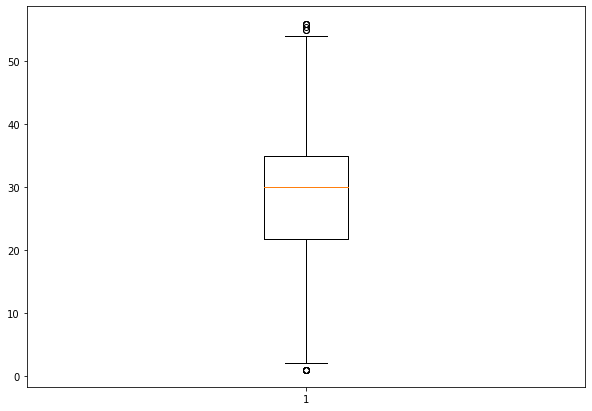

In [13]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df['Age'])
 
# show plot
plt.show()

# Test Model

In [14]:
#Select target variable for y
X = df.drop(columns=['Survived'])
y = df['Survived']
X

,Pclass,Age,SibSp,Parch,Fare,female,male
0,3,22.000000,1,0,7.2500,0.0,1.0
1,1,38.000000,1,0,71.2833,1.0,0.0
2,3,26.000000,0,0,7.9250,1.0,0.0
3,1,35.000000,1,0,53.1000,1.0,0.0
4,3,35.000000,0,0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0.0,1.0
887,1,19.000000,0,0,30.0000,1.0,0.0
888,3,21.777778,1,2,23.4500,1.0,0.0
889,1,26.000000,0,0,30.0000,0.0,1.0


In [15]:
#Divide dataset in training and test set.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [16]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
  #  "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
  #  "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
  #  GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
  #  QuadraticDiscriminantAnalysis(),
]

In [17]:
### Iteration to make more models and predict the score of each and everyone of them 
score_av = 0
c= 0
for i in classifiers: 
    for j in range(10):
        model = i
        model.fit(X_train,y_train)

        predictions = model.predict(X_test)
        score = accuracy_score(y_test, predictions)
        score_av += score
    av = score_av/10
    print(f'Score for {names[c]} model is: {av}')
    score_av = 0
    c += 1

Score for Nearest Neighbors model is: 0.6647058823529413
Score for Linear SVM model is: 0.7647058823529411
Score for RBF SVM model is: 0.6117647058823529
Score for Decision Tree model is: 0.8352941176470587
Score for Random Forest model is: 0.8223529411764705
Score for Neural Net model is: 0.7999999999999999
Score for AdaBoost model is: 0.7764705882352941
Score for Naive Bayes model is: 0.788235294117647


In [31]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train,y_train)

predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.8294117647058824

# Use model to make predictions

In [19]:
test = pd.read_csv("titanic_test.csv")
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
#Preprocess database 
df = test

#Impute values for age
counter = 0
for i in df['Age']:
    if pd.isna(i) == True:
        i = df.iloc[counter]['Name']
        if (i.find('Mrs') != -1):
            df.loc[counter,'Age'] = av1
        elif (i.find('Mr') != -1):
            df.loc[counter,'Age'] = av2
        elif (i.find('Miss') != -1):
            df.loc[counter,'Age'] = av3
        elif (i.find('Master') != -1):
            df.loc[counter,'Age'] = av4
        else:
            df.loc[counter,'Age'] = av5
    counter +=1

#Impute missing value for fare using mean
for i in ['Fare']: df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

#Eliminate columns that won't be used
df = df.drop(columns=[
    'Name', 'Ticket', 'Cabin','Embarked'])

#Encoding to change categorical values.
s = (df.dtypes == 'object')
cols = list(s[s].index)

OHE = OneHotEncoder(handle_unknown='ignore',sparse=False)

data_cols = pd.DataFrame(OHE.fit_transform(df[cols]))

df= pd.concat([df.reset_index(drop=True),data_cols.reset_index(drop=True)], axis=1)
df.rename(columns = {0:'female',1:'male'}, inplace = True)
df = df.drop(columns=['PassengerId', 'Sex'])

df.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
female    0
male      0
dtype: int64

In [21]:
predictions = model.predict(df)

results = test.drop(columns=[
    'Pclass','Cabin','Name', 'Sex', 'Age','Fare', 'SibSp', 'Parch','Ticket', 'Embarked'])
results['Survived'] = predictions

results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [22]:
results.to_csv("results.csv",index=False)

# Other useful code

#Impute values using mean
for i in ['Age']:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

#See if there are null values
df.isnull().sum()

#Outlier analysis
for x in ['Fare']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
    

#To do a single model with bagging:
model = BaggingClassifier(SVC(kernel="linear", C=0.025),n_estimators=10)
model.fit(X_train,y_train)

#Bagging  fits base classifiers each on random subsets of the original dataset and then aggregate their individual 
#predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be
#used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization
#into its construction procedure and then making an ensemble out of it.

predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators=1000).fit(X_train, y_train)
GBC.score(X_test, y_test)

